***Zomato Restaurant Clustering and Sentiment Analysis***

# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, I extracted the most recurrent words utilized in the reviews and visualized them through the creation of word clouds.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **Problem Statement**

The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

## ***1. Know Your Data***

In [ ]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud



from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization 
from sklearn.decomposition import NMF

from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA

#Silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

#for tokenization
from nltk.tokenize import word_tokenize

#for POS tagging(Part of sppech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UNIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\UNIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UNIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\UNIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\UNIQUE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
#LDA

from sklearn.decomposition import LatentDirichletAllocation

#import contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing shap for model expainability
!pip install shap
import shap

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

#The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Dataset loading

In [10]:
# Load dataset

hotel_df = pd.read_csv(r"C:\Users\UNIQUE\Desktop\Machine Learning\Code Work 3\Code Work\Zomato Restaurant names and Metadata.csv")
review_df = pd.read_csv(r"C:\Users\UNIQUE\Desktop\Machine Learning\Code Work 3\Code Work\Zomato Restaurant reviews.csv")

## Dataset First View

In [12]:
# Dataset First Look restaurant
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [13]:
# Dataset first look review

review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


## Dataset rows & columns count


In [15]:
# Dataset rows(observation) & columns count (feature)

print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


## Dataset Information


In [17]:
# Dataset info

print("Restaurant Info")
print("\n")
hotel_df.info()
print('='*120)
print("Review Info")
print("\n")
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB
Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
m

## Duplicate Values

In [19]:
# Dataset Duplicate Value Count
print('For Restaurant')
print('\n')
print(f"Data is duplicated ? {hotel_df.duplicated().value_counts()}, unique value with {len(hotel_df[hotel_df.duplicated()])} duplication")
print('\n')
print('=' * 120)
print('\n')
print('For Reviews')
print('\n')
print(f"Data is duplicated ? {review_df.duplicated().value_counts()}, unique value with {len(hotel_df[review_df.duplicated()])} duplication")


For Restaurant


Data is duplicated ? False    105
Name: count, dtype: int64, unique value with 0 duplication




For Reviews


Data is duplicated ? False    9964
True       36
Name: count, dtype: int64, unique value with 0 duplication


In [20]:
#getting duplicate values
print(f' Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

 Duplicate data count = 36


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [21]:
#checking values for american wild things
review_df[(review_df['Restaurant'] == 'American Wild Wings')].shape

(100, 7)

In [22]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant'] == 'Arena Eleven')].shape

(100, 7)

## Missing Values/Null Values


In [24]:
# Misiing Values/Null Values Count for hotel data
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [25]:
# Missing Values/Null Values Count for review data

review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

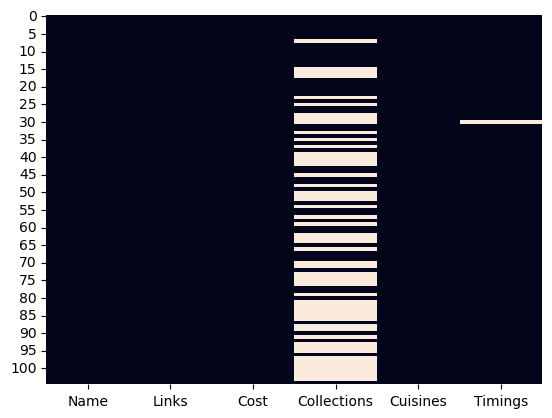

In [26]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(hotel_df.isnull(), cbar= False)

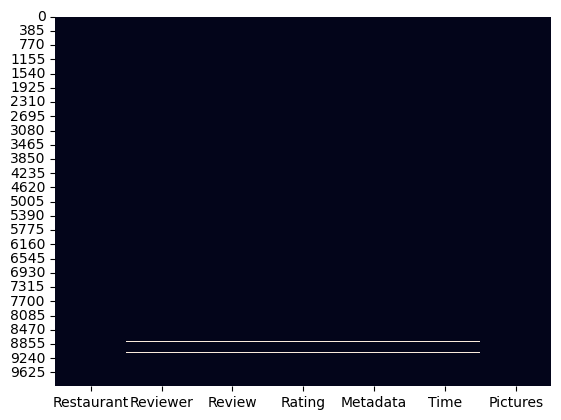

In [27]:
# Visualizing the missing values for reviews 
# Checking Null Value by plotting Heatmap

sns.heatmap(review_df.isnull(), cbar= False);

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns restaurant
print(f'Features : {hotel_df.columns.to_list()}')

Features : ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [32]:
# Dataset Columns review
print(f'Feature : {review_df.columns.to_list()}')

Feature : ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [33]:
# Dataset Describe restaurant
hotel_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [34]:
# Dataset Describe review
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.00,NaN,NaN,NaN,0.75,2.57,0.00,0.00,0.00,0.00,64.00


## Variable Description

**Attributes ▶**

  ---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review


### Check Unique Values for each variable.

In [38]:
# Check Unique Values for each variable for restaurant
for i in hotel_df.columns.tolist():
    print("No. of unique values in ",i,"is", hotel_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [39]:
# Check Unique Values for each variable for reviews
for i in review_df.columns.tolist():
    print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
#creating copy of both the data
hotel = hotel_df.copy()
review = review_df.copy()


####Restaurant

In [44]:
#before changing data type for cost checking values

hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [45]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function

hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [46]:
#top 5 costlier restaurant
hotel.sort_values('Cost', ascending = False )[["Name", "Cost"]][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [47]:
#top 5 economy restaurant
hotel.sort_values("Cost", ascending = False)[['Name', 'Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [48]:
#hotels that share same price
hotel_dict = {}
amount = hotel.Cost.values.tolist() 

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same 
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [49]:
#Hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [50]:
# spliting the cusines and storing in list 
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [51]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [52]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [53]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [54]:
# spliting the cusines and storing in list 
Collections_value_list = hotel.Collections.dropna().str.split(',')

In [55]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [56]:
# converting the dict to a data frame
Collections_df = pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number of Restaurants'})

In [57]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending = False)[:5]

,Tags,Number of Restaurants
0,Food Hygiene Rated Restaurants in Hyderabad,6
5,Live Sports Screenings,6
7,Great Buffets,6
1,Corporate Favorites,5
8,Hyderabad's Hottest,5


####Reviews

In [59]:
#in order to change data type for rating checking values
review.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [60]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0

#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [61]:
#since there is one rating as like converting it to median
review.loc[review['Rating']==0] = review.Rating.median()

In [62]:
review['Reviewer_Total_Review']=review['Metadata'].str.split(',',expand=True)[0]
review['Reviewer_Followers']=review['Metadata'].str.split(',', expand=True)[1]

review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ',expand=True)[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])

In [63]:
review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",5/25/2019 15:54,0,1.00,2.00
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.00,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.00,2.00
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.00,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.00,3.00
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.00,"1 Review , 1 Follower",5/24/2019 22:11,0,1.00,1.00
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.00,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.00,2.00
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.00,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53.00,54.00
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.50,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2.00,53.00
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.50,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65.00,423.00
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.00,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13.00,144.00
